In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()



In [2]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Text(0.5, 1.0, 'wiritng score')

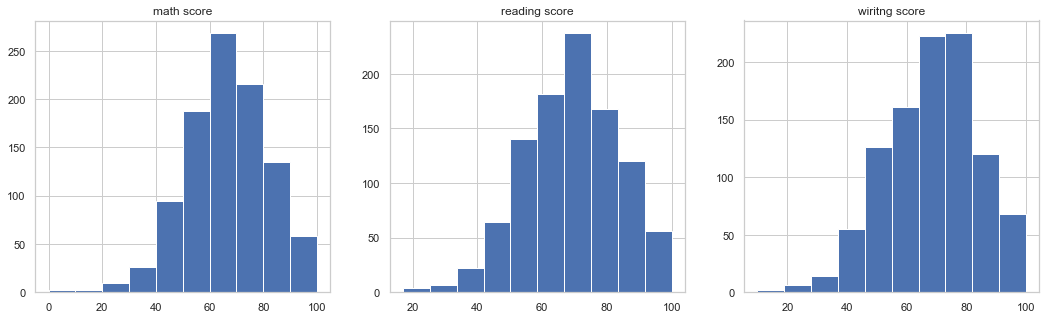

In [3]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(student_df["math score"])
plt.title("math score")
plt.subplot(1,3,2)
plt.hist(student_df["reading score"])
plt.title("reading score")
plt.subplot(1,3,3)
plt.hist(student_df["writing score"])
plt.title("wiritng score")

In [4]:
# test for normality


stats.normaltest(student_df['writing score'])

NormaltestResult(statistic=13.606450837263859, pvalue=0.0011101885439899974)

In [5]:
stats.normaltest(student_df['reading score'])


NormaltestResult(statistic=11.11741279628622, pvalue=0.003853758403576582)

In [6]:
stats.normaltest(student_df['math score'])

NormaltestResult(statistic=15.408960513931822, pvalue=0.00045080293869937836)

In [7]:
#does not look normal because p value is very small! 

In [8]:
from scipy.stats import boxcox

w_score_bcox = boxcox(student_df['writing score'])
r_score_bcox = boxcox(student_df['reading score'])
m_score_bcox = boxcox(student_df[student_df['math score'] > 0]['math score'])

Text(0.5, 1.0, 'Writing Score BoxCox')

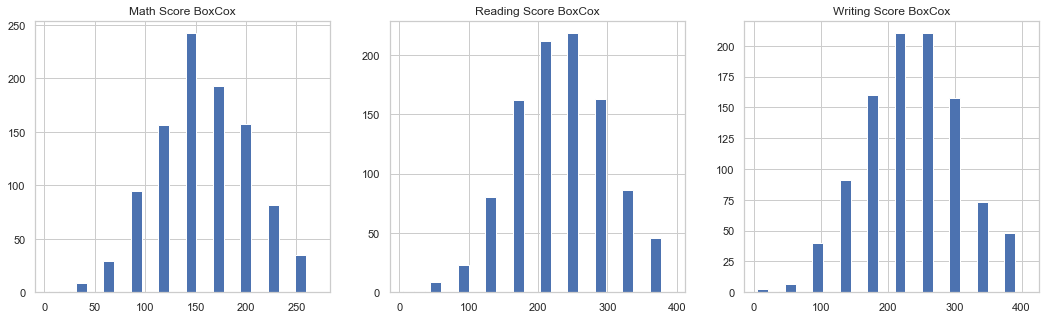

In [9]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(m_score_bcox)
plt.title('Math Score BoxCox')

plt.subplot(1,3,2)
plt.hist(r_score_bcox)
plt.title('Reading Score BoxCox')

plt.subplot(1,3,3)
plt.hist(w_score_bcox)
plt.title('Writing Score BoxCox')

NormaltestResult(statistic=15.186721327231322, pvalue=0.0005037851534494478)


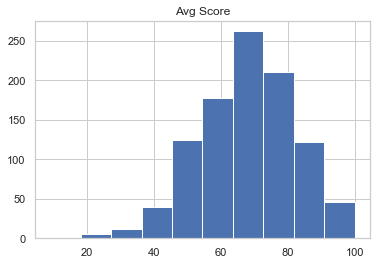

In [16]:
total_score = student_df['math score'] + student_df['reading score'] + student_df['writing score']
avg_score = total_score / 3

plt.hist(avg_score)
plt.title('Avg Score')



from scipy.stats import jarque_bera
from scipy.stats import normaltest

norm_test = normaltest(avg_score)
print(norm_test)

#not normally dist!!!

Text(0.5, 1.0, 'Avg Score Boxcox')

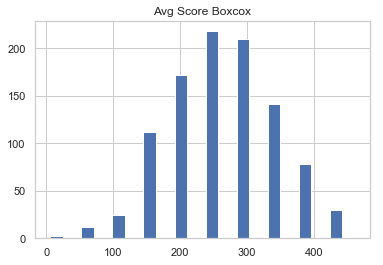

In [20]:
avg_score_boxcox = boxcox(avg_score)
plt.hist(avg_score_boxcox)
plt.title('Avg Score Boxcox')


([0, 1], <a list of 2 Text xticklabel objects>)

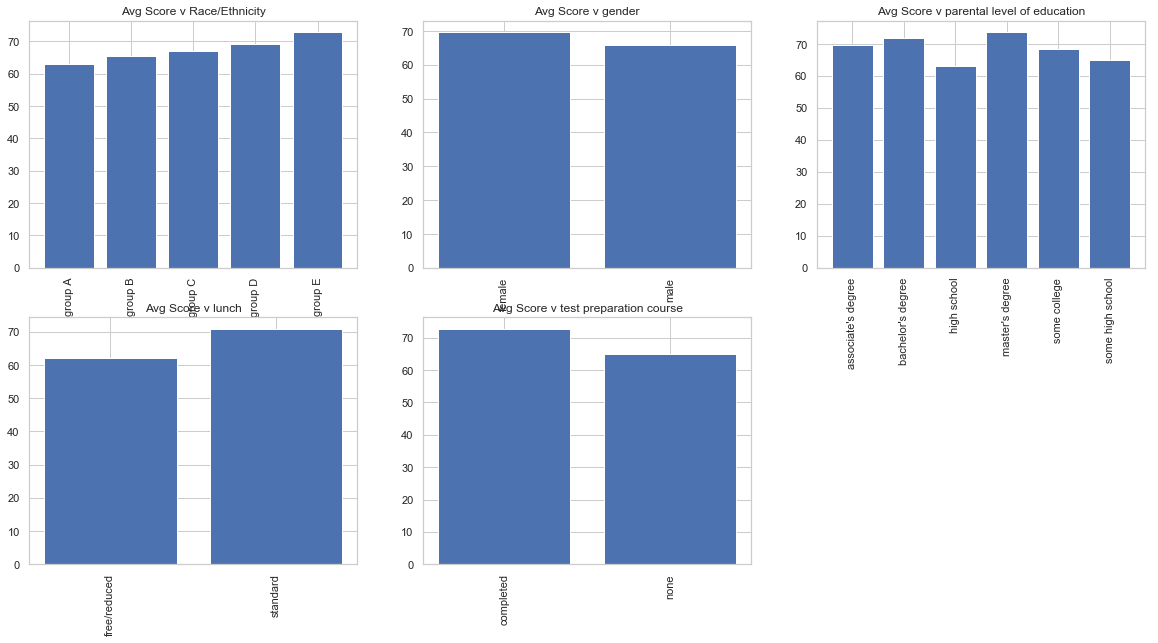

In [25]:
student_df['avg score'] = avg_score

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.bar(student_df.groupby('race/ethnicity')['avg score'].mean().index, student_df.groupby('race/ethnicity')['avg score'].mean())
plt.title('Avg Score v Race/Ethnicity')
plt.xticks(rotation='vertical')
plt.subplot(2,3,2)
plt.bar(student_df.groupby('gender')['avg score'].mean().index, student_df.groupby('gender')['avg score'].mean())
plt.title('Avg Score v gender')
plt.xticks(rotation='vertical')
plt.subplot(2,3,3)
plt.bar(student_df.groupby('parental level of education')['avg score'].mean().index, student_df.groupby('parental level of education')['avg score'].mean())
plt.title('Avg Score v parental level of education')
plt.xticks(rotation='vertical')
plt.subplot(2,3,4)
plt.bar(student_df.groupby('lunch')['avg score'].mean().index, student_df.groupby('lunch')['avg score'].mean())
plt.title('Avg Score v lunch')
plt.xticks(rotation='vertical')
plt.subplot(2,3,5)
plt.bar(student_df.groupby('test preparation course')['avg score'].mean().index, student_df.groupby('test preparation course')['avg score'].mean())
plt.title('Avg Score v test preparation course')
plt.xticks(rotation='vertical')

Group E scores higher than all other on test.  Might be important why.

Males less successful than female students.

Higher educated parents have children with better scores.

Free lunch produces lower avg test scores.

Completing test prep course inceases avg score.